<a href="https://colab.research.google.com/github/emillydepine/TesteGitFlow/blob/main/PI_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('ride.xlsx')

print(df.isnull().sum())
df['Schedule'] = pd.to_datetime(df['Schedule'])
df['Create'] = pd.to_datetime(df['Create'])
df['Updated'] = pd.to_datetime(df['Updated'])
df['Duration'] = (df['Updated'] - df['Create']).dt.total_seconds() / 60  # em minutos

print(df.describe())

RideID                    0
UserID                    0
Schedule                  0
Create                    0
RideStatusID              0
CompanyID                 0
ProviderID                4
RideProviderID          124
price                     0
Updated                   0
CategoryID              105
TotalUsers                0
Car                     128
RideDriverLocationID    128
ScheduledRide             0
dtype: int64
             RideID                       Schedule  \
count  1.320000e+02                            132   
mean   1.685690e+06  2025-02-10 12:59:05.479286528   
min    1.685624e+06  2025-02-10 11:51:12.789263600   
25%    1.685657e+06  2025-02-10 12:22:57.891699200   
50%    1.685690e+06  2025-02-10 12:56:24.897412352   
75%    1.685722e+06  2025-02-10 13:25:45.126716416   
max    1.685755e+06  2025-02-10 14:31:10.885844600   
std    3.824918e+01                            NaN   

                              Create  RideStatusID   CompanyID  ProviderID  \
co

In [4]:
longest_ride = df.loc[df['Duration'].idxmax()]
print("\nCorrida mais longa:")
print(f"ID: {longest_ride['RideID']}, Duração: {longest_ride['Duration']:.2f} minutos, Preço: ${longest_ride['price']:.2f}, Usuário: {longest_ride['UserID']}")


Corrida mais longa:
ID: 1685695, Duração: 19.15 minutos, Preço: $13.91, Usuário: 38e5adf5-9d07-4eeb-9a7f-74be0fb736af


In [5]:
fastest_ride = df.loc[df['Duration'].idxmin()]
print("\nCorrida mais rápida:")
print(f"ID: {fastest_ride['RideID']}, Duração: {fastest_ride['Duration']:.2f} minutos, Preço: ${fastest_ride['price']:.2f}, Usuário: {fastest_ride['UserID']}")


Corrida mais rápida:
ID: 1685662, Duração: 0.00 minutos, Preço: $0.00, Usuário: 3c7b5ce9-54d8-44a5-85dd-b1802bc7d8d3


In [6]:
most_expensive_ride = df.loc[df['price'].idxmax()]
print("\nCorrida mais cara:")
print(f"ID: {most_expensive_ride['RideID']}, Preço: ${most_expensive_ride['price']:.2f}, Duração: {most_expensive_ride['Duration']:.2f} minutos, Usuário: {most_expensive_ride['UserID']}")


Corrida mais cara:
ID: 1685728, Preço: $623.51, Duração: 1.19 minutos, Usuário: 17927845-690b-4866-928b-69df0f11668d


In [7]:
features = df[['price', 'Duration', 'TotalUsers']].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


cluster_stats = df.groupby('Cluster')[['price', 'Duration']].mean()
best_cluster = cluster_stats['price'].idxmin()  # Podemos ajustar esta lógica

print("\nMelhores opções (Cluster com melhor relação custo-benefício):")
best_rides = df[df['Cluster'] == best_cluster].sort_values(by=['price', 'Duration'])
print(best_rides[['RideID', 'price', 'Duration', 'UserID']].head(10))


Melhores opções (Cluster com melhor relação custo-benefício):
      RideID  price      Duration                                UserID
93   1685662   0.00  1.666667e-08  3c7b5ce9-54d8-44a5-85dd-b1802bc7d8d3
61   1685694   5.59  8.175073e-01  d62ec783-2851-48db-8b2e-474c5ec0c543
119  1685636   9.07  3.667281e-01  17d16638-04ca-4bec-854d-e3e9e5c87be3
111  1685644   9.07  1.030103e+00  17d16638-04ca-4bec-854d-e3e9e5c87be3
127  1685628   9.07  2.281461e+00  17d16638-04ca-4bec-854d-e3e9e5c87be3
89   1685666   9.08  1.001720e+00  17d16638-04ca-4bec-854d-e3e9e5c87be3
87   1685668   9.08  1.031825e+00  17d16638-04ca-4bec-854d-e3e9e5c87be3
98   1685657   9.08  2.614243e+00  17d16638-04ca-4bec-854d-e3e9e5c87be3
80   1685675   9.10  2.003802e-01  17d16638-04ca-4bec-854d-e3e9e5c87be3
54   1685701   9.11  2.955035e-01  17d16638-04ca-4bec-854d-e3e9e5c87be3


In [8]:
print("\nAnálise por Companhia:")
company_stats = df.groupby('CompanyID').agg({
    'price': ['mean', 'min', 'max'],
    'Duration': ['mean', 'min', 'max'],
    'RideID': 'count'
}).sort_values(('price', 'mean'), ascending=True)

print(company_stats.head(10))


Análise por Companhia:
               price                Duration                          RideID
                mean    min    max      mean           min        max  count
CompanyID                                                                   
78         10.225000   9.05  11.40  0.554149  2.652918e-01   0.843005      2
91         11.785000  10.23  13.34  0.651582  2.229591e-01   1.080205      2
2          12.477500   0.00  17.28  1.448794  2.000000e-08   5.255991      4
268        14.565000  11.40  17.73  1.388246  3.190000e-01   2.457492      2
44         19.060000  18.57  19.55  0.523196  4.952491e-01   0.551144      2
266        20.112500   5.59  33.61  0.644100  1.624810e-01   0.939132      4
230        20.343974   0.00  45.79  2.501693  1.666667e-08  19.146858     78
77         21.655000  16.57  26.74  0.193923  1.103044e-01   0.277541      2
265        21.739000   0.00  50.34  1.425949  1.666667e-08   2.848978     20
156        58.160000  58.16  58.16  1.480317  1.4803

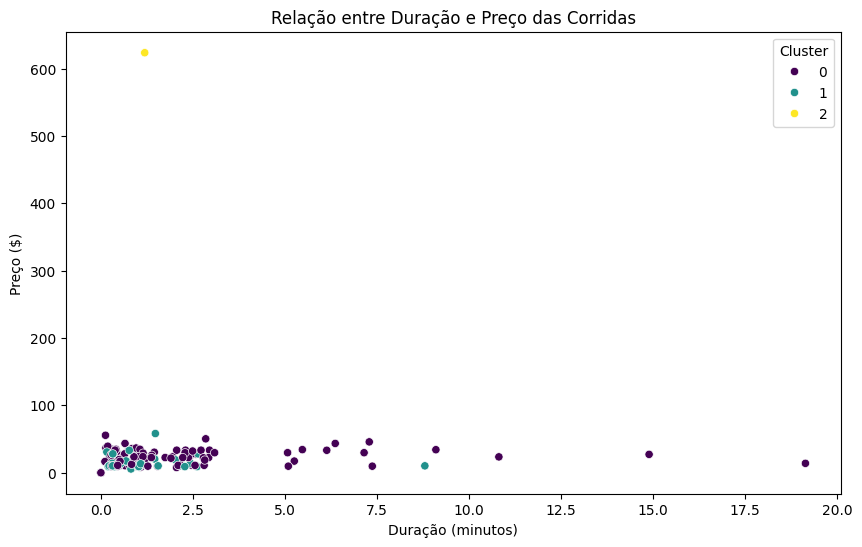

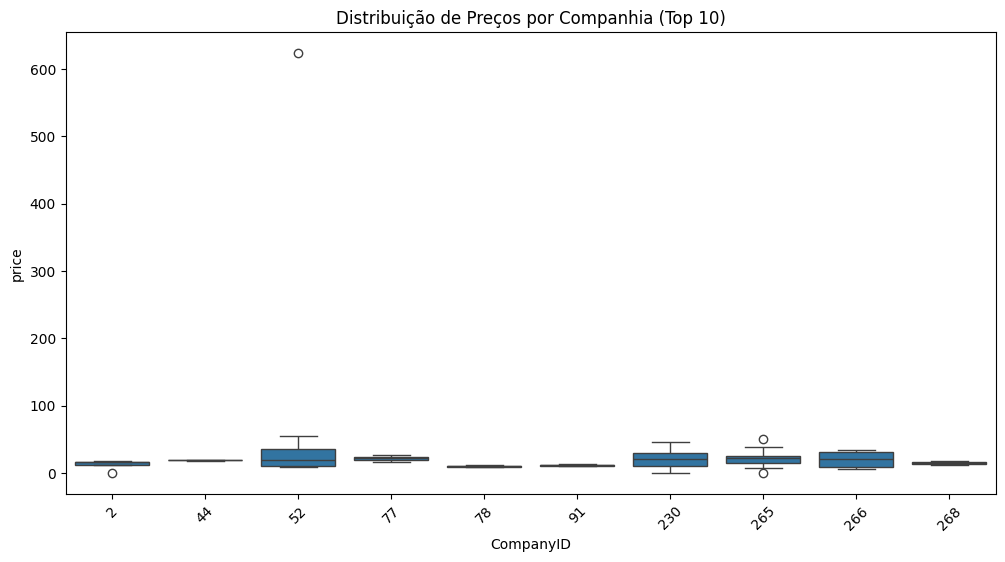

In [9]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration', y='price', hue='Cluster', palette='viridis')
plt.title('Relação entre Duração e Preço das Corridas')
plt.xlabel('Duração (minutos)')
plt.ylabel('Preço ($)')
plt.show()


top_companies = df['CompanyID'].value_counts().index[:10]
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['CompanyID'].isin(top_companies)], x='CompanyID', y='price')
plt.title('Distribuição de Preços por Companhia (Top 10)')
plt.xticks(rotation=45)
plt.show()